### Reading Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading Data
df = pd.read_csv('../data/raw/NYC-Airbnb-2023.csv')
df.head()

/var/folders/x9/n61cr7z95kj3xbpqjm2_3t6m0000gn/T/ipykernel_9429/1661608246.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/NYC-Airbnb-2023.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


In [3]:
df.shape

(42931, 18)

### Data Preprocessing

#### 1. Data Cleaning

##### Check and Correct Data Types

In [4]:
###########################################################################
# Check data types
###########################################################################

print(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


In [5]:
# Convert date time 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Verify the data type
print(df['last_review'].dtype)



datetime64[ns]


In [6]:
# Convert integer columns to int64 (though they are likely already int64)
integer_columns = [
    'id', 'host_id', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365', 
    'number_of_reviews_ltm'
    # , 'name_missing', 'host_name_missing', 'last_review_missing', 'reviews_per_month_missing'
]

# Convert these columns explicitly to int64
for col in integer_columns:
    df[col] = df[col].astype('int64')

# Convert float columns to float64
float_columns = [ 'price', 'latitude', 'longitude', 'reviews_per_month']

# Convert these columns explicitly to float64
for col in float_columns:
    df[col] = df[col].astype('float64')

# Verify the data types after conversion
print(df.dtypes)


id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object


##### Fix Inconsistencies: Standardize categorical values.

In [7]:
###########################################################################
# Standardize column names
###########################################################################
df.columns = (
    df.columns
    .str.lower()                  # Convert to lowercase
    .str.replace(' ', '_')        # Replace spaces with underscores
    .str.replace(r'[^\w\s]', '')  # Remove special characters
)

In [8]:

###########################################################################
# # Ensuring column names are unique
###########################################################################
# Step 1: Get the total number of columns
total_columns = len(df.columns)

# # Step 2: Get the unique column names
unique_columns = df.columns.unique()

# Step 3: Check if the shape of total and unique column names are the same
if total_columns == len(unique_columns):
    print("No duplication in column names")
else:
    print("Duplication found in column names")
    
    # Step 4: Apply the duplicate() method to deduplicate column names
    # will return original names if no duplication otherwise column_name_dup1, column_name_dup2 etc for duplicated
    # column names
    df.columns = df.columns.duplicate(suffix='_dup')

    print("Column names after deduplication:")
    print(df.columns)


No duplication in column names


In [9]:
###########################################################################
#  Remove Leading/Trailing Whitespace from String Columns 
###########################################################################

# Define string columns
string_columns = ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']

# Remove leading/trailing whitespace from string columns
df[string_columns] = df[string_columns].apply(lambda x: x.str.strip())


##### Remove Duplicates

1. Identify and Remove Duplicates:

In [10]:
###########################################################################
# Check for duplicates
# Find and remove duplicate rows in the DataFrame.
###########################################################################

# Find duplicate rows
duplicate_rows = df.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify removal of duplicates
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


##### Handle Missing Values:

In [11]:
# Identify Missing Values:
# Check for missing values
missing_data_summary = df.isnull().sum().reset_index()
missing_data_summary.columns = ['Column', 'Missing Values']
missing_data_summary['% Missing'] = (missing_data_summary['Missing Values'] / len(df)) * 100

# Display the summary
print(missing_data_summary)

                            Column  Missing Values  % Missing
0                               id               0   0.000000
1                             name              12   0.027952
2                          host_id               0   0.000000
3                        host_name               5   0.011647
4              neighbourhood_group               0   0.000000
5                    neighbourhood               0   0.000000
6                         latitude               0   0.000000
7                        longitude               0   0.000000
8                        room_type               0   0.000000
9                            price               0   0.000000
10                  minimum_nights               0   0.000000
11               number_of_reviews               0   0.000000
12                     last_review           10304  24.001304
13               reviews_per_month           10304  24.001304
14  calculated_host_listings_count               0   0.000000
15      

In [12]:
# Save the summary to a file for reference
missing_data_summary.to_csv('../reports/missing_data_summary.csv', index=False)

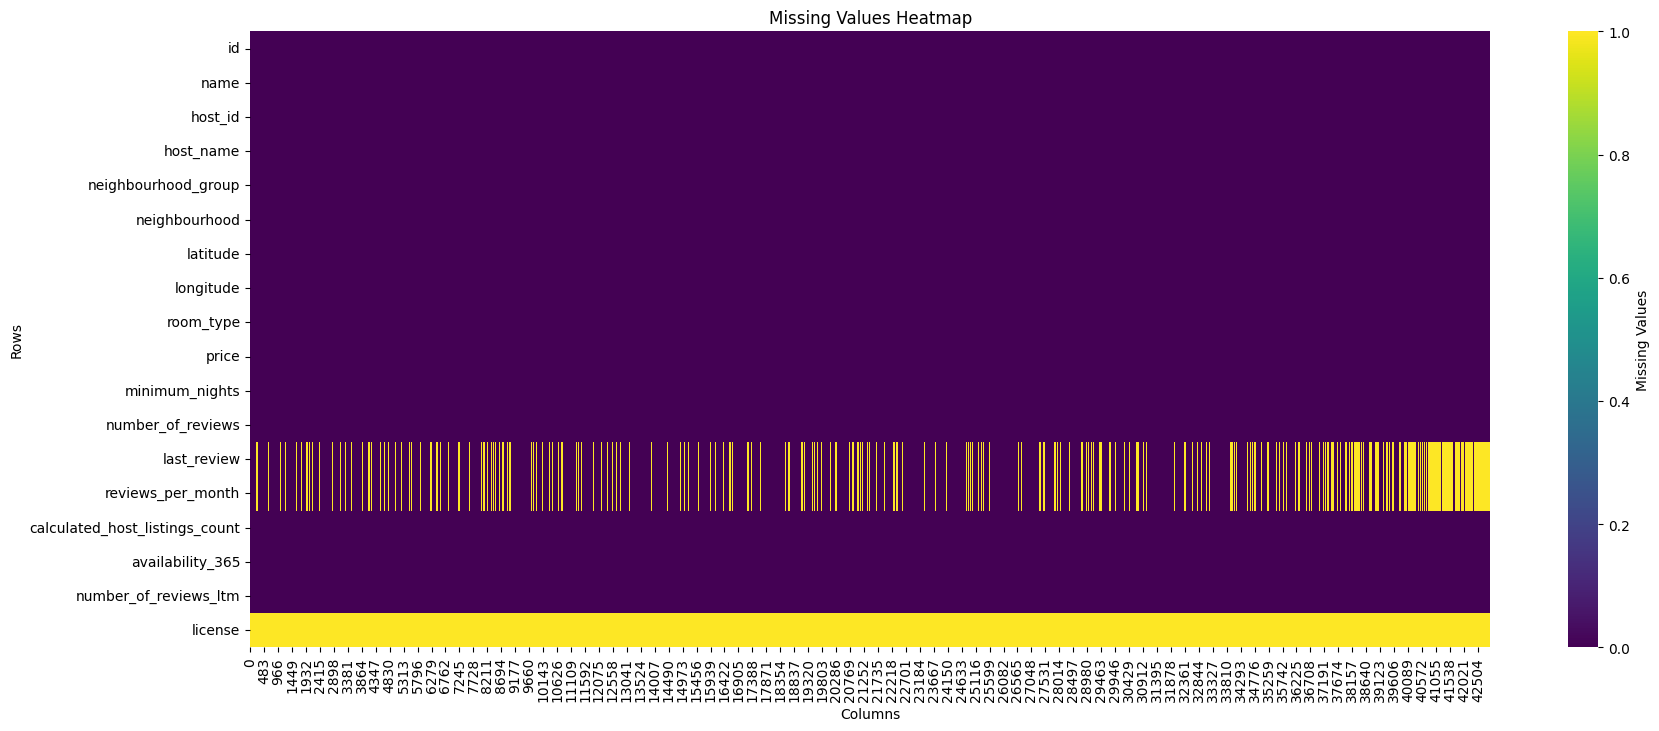

In [13]:
# Visualise missing values
import seaborn as sns
import matplotlib.pyplot as plt
# Visualise missing values
plt.figure(figsize=(20, 8))
sns.heatmap(df.isnull().T, cmap='viridis', cbar_kws={'label': 'Missing Values'})
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Values Heatmap')
# Visualize missing data using heatmap
plt.savefig('../reports/figures/missing_value_heatmap.png')
plt.show()

a.   Removal:
Remove rows with missing values if imputation is not feasible

In [14]:
# Remove rows/columns with missing values
# license column (~99.99% missing)
df.drop(columns=['license'], inplace=True)

In [15]:
# check if the license column is dropped
df.shape

(42931, 17)

b.    Flagging:

In [16]:
# Create flag columns
df['name_missing'] = df['name'].isna().astype(int)
df['host_name_missing'] = df['host_name'].isna().astype(int)
df['last_review_missing'] = df['last_review'].isna().astype(int)
df['reviews_per_month_missing'] = df['reviews_per_month'].isna().astype(int)

In [17]:
# verify flgging name_missing
df.loc[(df['name_missing'] == 1),['name','name_missing']]

,name,name_missing
2734,NaN,1
2887,NaN,1
2969,NaN,1
3157,NaN,1
4240,NaN,1
5842,NaN,1
6242,NaN,1
6556,NaN,1
6589,NaN,1
7670,NaN,1


In [18]:
# verify flagging host_name
df.loc[(df['host_name_missing'] == 1),['host_name','host_name_missing']]

,host_name,host_name_missing
2860,NaN,1
3128,NaN,1
4012,NaN,1
4347,NaN,1
4732,NaN,1


In [19]:
# verify flgging last_review_missing
df.loc[(df['last_review_missing'] == 1),['last_review','last_review_missing']]

,last_review,last_review_missing
15,NaT,1
47,NaT,1
88,NaT,1
101,NaT,1
114,NaT,1
...,...,...
42926,NaT,1
42927,NaT,1
42928,NaT,1
42929,NaT,1


In [20]:
# verify flgging reviews_per_month_missing
df.loc[(df['reviews_per_month_missing'] == 1),['reviews_per_month','reviews_per_month_missing']]

,reviews_per_month,reviews_per_month_missing
15,NaN,1
47,NaN,1
88,NaN,1
101,NaN,1
114,NaN,1
...,...,...
42926,NaN,1
42927,NaN,1
42928,NaN,1
42929,NaN,1


In [21]:
df['name_missing'].value_counts()

name_missing
0    42919
1       12
Name: count, dtype: int64

In [22]:
df['host_name_missing'].value_counts()

host_name_missing
0    42926
1        5
Name: count, dtype: int64

In [23]:
# verify flgging last_review_missing
df['last_review_missing'].value_counts()

last_review_missing
0    32627
1    10304
Name: count, dtype: int64

In [24]:
# verify flgging reviews_per_month_missing
df['reviews_per_month_missing'].value_counts()

reviews_per_month_missing
0    32627
1    10304
Name: count, dtype: int64

c. Imputation

In [25]:
# Imputing both Categorical columns name & host_name with 'Unknown'
# name and host_name columns (~0.03% and ~0.01% missing)
df['name'] = df['name'].fillna('Unknown')
df['host_name'] = df['host_name'].fillna('Unknown')
# Impute last_review with a 1970-01-01 default date and reviews_per_month with 0.0
df['last_review'] = df['last_review'].fillna(pd.Timestamp('1970-01-01'))
df['reviews_per_month'] = df['reviews_per_month'].fillna(0.0)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              42931 non-null  int64         
 1   name                            42931 non-null  object        
 2   host_id                         42931 non-null  int64         
 3   host_name                       42931 non-null  object        
 4   neighbourhood_group             42931 non-null  object        
 5   neighbourhood                   42931 non-null  object        
 6   latitude                        42931 non-null  float64       
 7   longitude                       42931 non-null  float64       
 8   room_type                       42931 non-null  object        
 9   price                           42931 non-null  float64       
 10  minimum_nights                  42931 non-null  int64         
 11  nu

##### Correct Errors

In [27]:
# Before applying correction:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,name_missing,host_name_missing,last_review_missing,reviews_per_month_missing
count,4.293100e+04,4.293100e+04,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000
mean,2.222772e+17,1.516012e+08,40.728273,-73.943665,200.307167,18.111178,25.856001,2009-03-27 05:51:33.345135360,0.888416,24.054809,140.262211,7.736507,0.000280,0.000116,0.240013,0.240013
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,1970-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.940474e+07,1.608533e+07,40.687485,-73.981750,75.000000,2.000000,1.000000,2015-08-19 12:00:00,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.337482e+07,7.433812e+07,40.724040,-73.952620,125.000000,7.000000,5.000000,2022-03-06 00:00:00,0.240000,1.000000,89.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.305016e+17,2.680692e+08,40.762293,-73.924035,200.000000,30.000000,24.000000,2023-01-06 00:00:00,1.170000,4.000000,289.000000,7.000000,0.000000,0.000000,0.000000,0.000000
max,8.404660e+17,5.038729e+08,40.911380,-73.710870,99000.000000,1250.000000,1842.000000,2023-03-06 00:00:00,86.610000,526.000000,365.000000,1093.000000,1.000000,1.000000,1.000000,1.000000
std,3.344213e+17,1.621301e+08,0.057640,0.056627,895.082911,27.462513,56.616344,NaN,1.638122,80.867958,142.001486,18.290256,0.016717,0.010791,0.427096,0.427096


In [28]:
# Validate and Correct Numerical Values:

# Correct Negative Values for price: Ensure the price is non-negative, as a negative price doesn't make sense.
df['price'] = df['price'].apply(lambda x: max(x, 0))

# Latitude and Longitude Validation: Ensure latitude is between -90 and 90 and longitude is between -180 and 180.
# Latitude correction
df['latitude'] = df['latitude'].apply(lambda x: min(max(x, -90), 90))

# Longitude correction
df['longitude'] = df['longitude'].apply(lambda x: min(max(x, -180), 180))

# Ensure minimum_nights is a Positive Integer:
df['minimum_nights'] = df['minimum_nights'].apply(lambda x: max(x, 1))

# Ensure availability_365 is within 0 to 365:
df['availability_365'] = df['availability_365'].apply(lambda x: min(max(x, 0), 365))

# Ensure number_of_reviews, calculated_host_listings_count, and number_of_reviews_ltm are Non-negative:
df['number_of_reviews'] = df['number_of_reviews'].apply(lambda x: max(x, 0))
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].apply(lambda x: max(x, 0))
df['number_of_reviews_ltm'] = df['number_of_reviews_ltm'].apply(lambda x: max(x, 0))


In [29]:
# After correction applied:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,name_missing,host_name_missing,last_review_missing,reviews_per_month_missing
count,4.293100e+04,4.293100e+04,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000
mean,2.222772e+17,1.516012e+08,40.728273,-73.943665,200.307167,18.111178,25.856001,2009-03-27 05:51:33.345135360,0.888416,24.054809,140.262211,7.736507,0.000280,0.000116,0.240013,0.240013
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,1970-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.940474e+07,1.608533e+07,40.687485,-73.981750,75.000000,2.000000,1.000000,2015-08-19 12:00:00,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.337482e+07,7.433812e+07,40.724040,-73.952620,125.000000,7.000000,5.000000,2022-03-06 00:00:00,0.240000,1.000000,89.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.305016e+17,2.680692e+08,40.762293,-73.924035,200.000000,30.000000,24.000000,2023-01-06 00:00:00,1.170000,4.000000,289.000000,7.000000,0.000000,0.000000,0.000000,0.000000
max,8.404660e+17,5.038729e+08,40.911380,-73.710870,99000.000000,1250.000000,1842.000000,2023-03-06 00:00:00,86.610000,526.000000,365.000000,1093.000000,1.000000,1.000000,1.000000,1.000000
std,3.344213e+17,1.621301e+08,0.057640,0.056627,895.082911,27.462513,56.616344,NaN,1.638122,80.867958,142.001486,18.290256,0.016717,0.010791,0.427096,0.427096


In [30]:
df.price.sort_values(ascending=True)

22955        0.0
20718        0.0
20791        0.0
22823        0.0
20798        0.0
          ...   
9809     20500.0
9418     65115.0
34929    85100.0
32440    85170.0
34299    99000.0
Name: price, Length: 42931, dtype: float64

##### Handle Outliers

IQR:
(non-parametric approach to detect outliers. It's based on the distribution of data within the interquartile range (IQR))

Use:

Non-normal data: IQR is suitable for datasets with non-normal distributions, as it doesn't assume a specific distribution shape.

Skewed data: IQR is effective for detecting outliers in skewed distributions, where the median is a better representation of the data's central tendency.

Robust to outliers: IQR is less affected by the presence of outliers, making it a robust method for detecting outliers in datasets with a small number of extreme values.

Easy to interpret: IQR-based outlier detection is straightforward to understand and visualize.

Z-Score:
(known as the Modified Z-Score method, is a parametric approach to detect outliers. It's based on the number of standard deviations from the mean that a data point is)

Use:

Normal data: Z-Score is suitable for datasets with a normal distribution, as it assumes a bell-shaped curve.

Large datasets: Z-Score is effective for detecting outliers in large datasets, where the Central Limit Theorem (CLT) applies.

Sensitive to outliers: Z-Score is more sensitive to outliers than IQR, making it suitable for detecting outliers in datasets with a small number of extreme values.

Statistical inference: Z-Score is useful for statistical inference, such as hypothesis testing and confidence intervals.

Domain Knowledge Method:
technique used to detect outliers based on prior knowledge or expertise about the data.

Use:

Subject matter expertise: Use Domain Knowledge when you have extensive knowledge about the data domain, such as business rules, regulations, or industry standards.

Specific data constraints: Apply Domain Knowledge when there are specific constraints or limitations on the data, such as valid ranges for values.

Data quality issues: Use Domain Knowledge to detect outliers that may indicate data quality issues, such as invalid or missing values.

Compliance requirements: Apply Domain Knowledge to ensure compliance with regulations or industry standards.

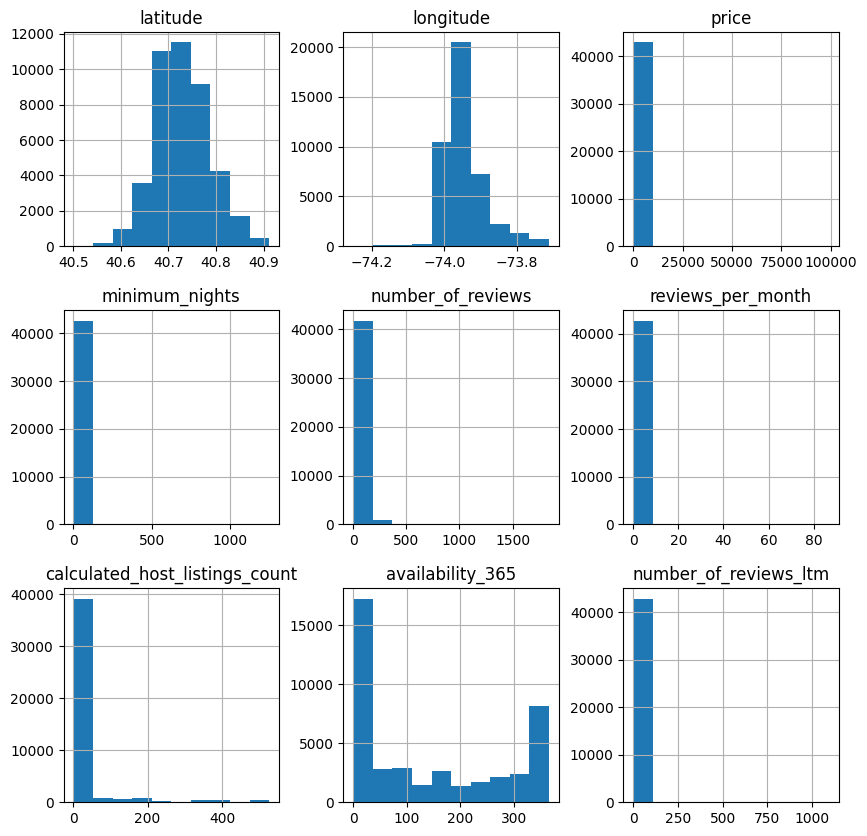

In [31]:
# check the shape of numerical columns without identifiers 
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
identifier_cols = ['id', 'host_id', 'name_missing', 'host_name_missing', 'last_review_missing', 'reviews_per_month_missing']
numerical_cols = [col for col in numerical_cols if col not in identifier_cols]
df[numerical_cols].hist(figsize=(10, 10))
plt.show()

In [32]:
df.shape

(42931, 21)

In [33]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,name_missing,host_name_missing,last_review_missing,reviews_per_month_missing
count,4.293100e+04,4.293100e+04,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000
mean,2.222772e+17,1.516012e+08,40.728273,-73.943665,200.307167,18.111178,25.856001,2009-03-27 05:51:33.345135360,0.888416,24.054809,140.262211,7.736507,0.000280,0.000116,0.240013,0.240013
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,1970-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.940474e+07,1.608533e+07,40.687485,-73.981750,75.000000,2.000000,1.000000,2015-08-19 12:00:00,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.337482e+07,7.433812e+07,40.724040,-73.952620,125.000000,7.000000,5.000000,2022-03-06 00:00:00,0.240000,1.000000,89.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.305016e+17,2.680692e+08,40.762293,-73.924035,200.000000,30.000000,24.000000,2023-01-06 00:00:00,1.170000,4.000000,289.000000,7.000000,0.000000,0.000000,0.000000,0.000000
max,8.404660e+17,5.038729e+08,40.911380,-73.710870,99000.000000,1250.000000,1842.000000,2023-03-06 00:00:00,86.610000,526.000000,365.000000,1093.000000,1.000000,1.000000,1.000000,1.000000
std,3.344213e+17,1.621301e+08,0.057640,0.056627,895.082911,27.462513,56.616344,NaN,1.638122,80.867958,142.001486,18.290256,0.016717,0.010791,0.427096,0.427096


In [34]:
numerical_cols

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm']

In [35]:
import pandas as pd
import numpy as np

# Function to log-transform columns with positive values, skipping those with zero or negative values
def log_transform_columns(df, columns):
    skipped_columns = []
    log_transformed_cols = []
    
    # Create a copy of the original DataFrame to preserve it
    log_transformed_df = df.copy()

    for col in columns:
        # Check if the column contains only positive values
        if (log_transformed_df[col] > 0).all():
            # Apply log transformation
            log_transformed_df[f'{col}_log'] = np.log(log_transformed_df[col])
            log_transformed_cols.append(f'{col}_log')
        else:
            skipped_columns.append(col)
    
    return log_transformed_df, log_transformed_cols, skipped_columns

# Modular function to detect IQR-based outliers
def detect_outliers_iqr(df, columns, threshold_iqr=3):
    iqr_outliers = {}
    outlier_indices = set()

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold_iqr * IQR
        upper_bound = Q3 + threshold_iqr * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        if not outliers.empty:
            print(f"IQR: Detected {outliers.shape[0]} outliers in '{col}'.")
            iqr_outliers[col] = outliers
            outlier_indices.update(outliers.index)
        else:
            print(f"No outliers detected in column '{col}' using IQR.")
    
    # Consolidate the outliers into a single DataFrame and drop duplicates
    outliers_df = df.loc[list(outlier_indices)].drop_duplicates()

    return outliers_df, iqr_outliers

# Main workflow for outlier detection with log transformation and skipped columns
def outlier_detection_workflow(df, numerical_cols, identifier_cols):
    # Step 1: Exclude identifier columns
    columns_to_process = [col for col in numerical_cols if col not in identifier_cols]

    # Step 2: Log transform columns where applicable
    log_transformed_df, log_transformed_cols, skipped_columns = log_transform_columns(df, columns_to_process)

    # Step 3: Detect IQR outliers in log-transformed columns
    if log_transformed_cols:
        print("Detecting outliers in log-transformed columns...")
        outliers_log_df, _ = detect_outliers_iqr(log_transformed_df, log_transformed_cols)
    else:
        print("No log-transformed columns available for outlier detection.")
        outliers_log_df = pd.DataFrame()

    # Step 4: Detect IQR outliers in skipped columns
    if skipped_columns:
        print("Detecting outliers in skipped columns (untransformed)...")
        outliers_skipped_df, _ = detect_outliers_iqr(df, skipped_columns)
    else:
        print("No skipped columns available for outlier detection.")
        outliers_skipped_df = pd.DataFrame()

    # Step 5: Combine outliers from both log-transformed and skipped columns
    combined_outliers_df = pd.concat([outliers_log_df, outliers_skipped_df]).drop_duplicates()

    print(f"Total unique outliers detected: {combined_outliers_df.shape[0]}")

    # Return results
    return {
        'combined_outliers': combined_outliers_df,
        'log_transformed_columns': log_transformed_cols,
        'skipped_columns': skipped_columns,
        'log_transformed_df': log_transformed_df  # Return the new DataFrame with log transformations
    }

# Usage:

# Identify numerical columns excluding identifiers
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
identifier_cols = ['id', 'host_id', 'name_missing', 'host_name_missing', 'last_review_missing', 'reviews_per_month_missing']
numerical_cols = [col for col in numerical_cols if col not in identifier_cols]

# Run the outlier detection workflow
outlier_results = outlier_detection_workflow(df, numerical_cols, identifier_cols)

# Access the results
combined_outliers = outlier_results['combined_outliers']
log_transformed_cols = outlier_results['log_transformed_columns']
untransformed_skipped_cols = outlier_results['skipped_columns']
log_transformed_df = outlier_results['log_transformed_df']  # This is the transformed DataFrame

# Check results
print(f"Outliers DataFrame: {combined_outliers.shape}")
print(f"Log-transformed columns: {log_transformed_cols}")
print(f"Untransformed log Skipped columns: {untransformed_skipped_cols}")
print(f"Log-transformed DataFrame: {log_transformed_df.shape}")


Detecting outliers in log-transformed columns...
No outliers detected in column 'latitude_log' using IQR.
No outliers detected in column 'minimum_nights_log' using IQR.
IQR: Detected 1276 outliers in 'calculated_host_listings_count_log'.
Detecting outliers in skipped columns (untransformed)...
IQR: Detected 507 outliers in 'longitude'.
IQR: Detected 1655 outliers in 'price'.
IQR: Detected 3350 outliers in 'number_of_reviews'.
IQR: Detected 1090 outliers in 'reviews_per_month'.
No outliers detected in column 'availability_365' using IQR.
IQR: Detected 4017 outliers in 'number_of_reviews_ltm'.
Total unique outliers detected: 9038
Outliers DataFrame: (9038, 24)
Log-transformed columns: ['latitude_log', 'minimum_nights_log', 'calculated_host_listings_count_log']
Untransformed log Skipped columns: ['longitude', 'price', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'number_of_reviews_ltm']
Log-transformed DataFrame: (42931, 24)


In [36]:
combined_outliers.shape

(9038, 24)

In [37]:
df.shape

(42931, 21)

In [38]:
log_transformed_df.shape

(42931, 24)

In [39]:
# Check the proportion of outliers
total_rows = df.shape[0]
outliers_proportion = len(combined_outliers) / total_rows * 100
print(f"Outliers constitute {outliers_proportion:.2f}% of the total data.")

Outliers constitute 21.05% of the total data.


In [40]:
import numpy as np

def cap_outliers(df, numerical_cols, lower_quantile=0.01, upper_quantile=0.99):
    """
    Caps the outliers in the numerical columns of the DataFrame based on specified quantiles.

    Args:
        df (pd.DataFrame): The input DataFrame containing numerical columns.
        numerical_cols (list): List of numerical column names to cap outliers for.
        lower_quantile (float, optional): The lower quantile value to cap values below this percentile. Defaults to 0.01.
        upper_quantile (float, optional): The upper quantile value to cap values above this percentile. Defaults to 0.99.

    Returns:
        pd.DataFrame: A DataFrame with outliers capped in the specified numerical columns.
    """
    capped_df = df.copy()
    
    for col in numerical_cols:
        lower_bound = df[col].quantile(lower_quantile)
        upper_bound = df[col].quantile(upper_quantile)
        
        # Cap values outside of the quantile range
        capped_df[col] = np.clip(df[col], lower_bound, upper_bound)
        
        print(f"Outliers in '{col}' capped between {lower_bound} and {upper_bound}.")
    
    return capped_df

# Usage example
numerical_cols = log_transformed_df.select_dtypes(include=[np.number]).columns.tolist()
identifier_cols = ['id', 'host_id', 'name_missing', 'host_name_missing', 'last_review_missing', 'reviews_per_month_missing']
numerical_cols = [col for col in numerical_cols if col not in identifier_cols]

# Apply the capping function
cleaned_df = cap_outliers(log_transformed_df, numerical_cols)

# Check the shape of the cleaned DataFrame
print(f"Cleaned DataFrame shape: {cleaned_df.shape}")


Outliers in 'latitude' capped between 40.590773 and 40.872665.
Outliers in 'longitude' capped between -74.03889799999999 and -73.750799.
Outliers in 'price' capped between 30.0 and 1262.0.
Outliers in 'minimum_nights' capped between 1.0 and 90.0.
Outliers in 'number_of_reviews' capped between 0.0 and 270.0.
Outliers in 'reviews_per_month' capped between 0.0 and 6.17.
Outliers in 'calculated_host_listings_count' capped between 1.0 and 526.0.
Outliers in 'availability_365' capped between 0.0 and 365.0.
Outliers in 'number_of_reviews_ltm' capped between 0.0 and 65.0.
Outliers in 'latitude_log' capped between 3.7035407747689955 and 3.710461502202023.
Outliers in 'minimum_nights_log' capped between 0.0 and 4.499809670330265.
Outliers in 'calculated_host_listings_count_log' capped between 0.0 and 6.26530121273771.
Cleaned DataFrame shape: (42931, 24)


In [41]:
cleaned_df.shape

(42931, 24)

##### Verify Data Quality

a. Re-check Missing Values:

In [42]:
# Verify there are no more missing values
missing_values_after = cleaned_df.isnull().sum()
print(missing_values_after)

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
name_missing                          0
host_name_missing                     0
last_review_missing                   0
reviews_per_month_missing             0
latitude_log                          0
minimum_nights_log                    0
calculated_host_listings_count_log    0
dtype: int64


In [43]:
cleaned_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'name_missing',
       'host_name_missing', 'last_review_missing', 'reviews_per_month_missing',
       'latitude_log', 'minimum_nights_log',
       'calculated_host_listings_count_log'],
      dtype='object')

In [44]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'name_missing',
       'host_name_missing', 'last_review_missing',
       'reviews_per_month_missing'],
      dtype='object')

##### Save Cleaned Data

1. Save the Cleaned Data

In [45]:
# Save the cleaned dataset
cleaned_df.to_csv('../data/processed/cleaned_NYC-Airbnb-2023.csv', index=False)

#### 2.	Data Transformation

##### 1. Normalize / Scale Numerical Features

In [46]:
cleaned_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,number_of_reviews_ltm,name_missing,host_name_missing,last_review_missing,reviews_per_month_missing,latitude_log,minimum_nights_log,calculated_host_listings_count_log
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150.0,...,3,314,1,0,0,0,0,3.707543,3.401197,1.098612
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60.0,...,2,365,0,0,0,0,0,3.705868,3.401197,0.693147
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75.0,...,1,0,0,0,0,0,0,3.708775,0.693147,0.000000
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68.0,...,1,106,52,0,0,0,0,3.707813,0.693147,0.000000
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275.0,...,1,181,1,0,0,0,0,3.705310,4.094345,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,839753193689829909,bright studio in Williamsburg,28057253,Jean,Brooklyn,Williamsburg,40.718976,-73.963985,Entire home/apt,76.0,...,1,8,0,0,0,1,1,3.706694,1.945910,0.000000
42927,839786573617495393,Room in the heart of LES with Gym& Rooftop BBQ,247439246,Charlene,Manhattan,East Village,40.721703,-73.981473,Private room,32.0,...,5,79,0,0,0,1,1,3.706761,3.401197,1.609438
42928,839797749155954018,Fantastic 3BD apt in Brooklyn,26349246,Jose,Brooklyn,Bushwick,40.688700,-73.907650,Entire home/apt,127.0,...,8,356,0,0,0,1,1,3.705950,1.098612,2.079442
42929,839814083143454171,The Coziest Home,48533809,Remmy,Staten Island,Bull's Head,40.616911,-74.038898,Entire home/apt,280.0,...,1,87,0,0,0,1,1,3.704185,0.000000,0.000000


In [47]:
# numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# identifier_cols = ['id', 'host_id', 'name_missing', 'host_name_missing', 'last_review_missing', 'reviews_per_month_missing']
# numerical_cols = [col for col in numerical_cols if col not in identifier_cols]

In [48]:
cleaned_df.select_dtypes(include=['int', 'float']).columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'name_missing', 'host_name_missing',
       'last_review_missing', 'reviews_per_month_missing', 'latitude_log',
       'minimum_nights_log', 'calculated_host_listings_count_log'],
      dtype='object')

In [49]:
cleaned_df[numerical_cols].skew()

latitude                              0.222610
longitude                             1.469689
price                                 3.444684
minimum_nights                        1.356968
number_of_reviews                     3.075546
reviews_per_month                     2.030201
calculated_host_listings_count        4.616770
availability_365                      0.441732
number_of_reviews_ltm                 2.350467
latitude_log                          0.218661
minimum_nights_log                   -0.187623
calculated_host_listings_count_log    1.771131
dtype: float64

   1. Min-Max Scaling:

In [50]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scale(df, numerical_columns):
    """
    Apply Min-Max scaling to the specified numerical columns in the dataframe.
    
    Parameters:
    df (pd.DataFrame): The original DataFrame.
    numerical_columns (list): List of column names to be scaled.
    
    Returns:
    pd.DataFrame: A new DataFrame with Min-Max scaled columns.
    """
    scaler = MinMaxScaler()
    df_scaled = df.copy()
    df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    
    return df_scaled
df_scaled_min_max = min_max_scale(cleaned_df, numerical_cols)

In [51]:
print(df_scaled_min_max[numerical_cols].min())
print(df_scaled_min_max[numerical_cols].max())

latitude                              0.0
longitude                             0.0
price                                 0.0
minimum_nights                        0.0
number_of_reviews                     0.0
reviews_per_month                     0.0
calculated_host_listings_count        0.0
availability_365                      0.0
number_of_reviews_ltm                 0.0
latitude_log                          0.0
minimum_nights_log                    0.0
calculated_host_listings_count_log    0.0
dtype: float64
latitude                              1.0
longitude                             1.0
price                                 1.0
minimum_nights                        1.0
number_of_reviews                     1.0
reviews_per_month                     1.0
calculated_host_listings_count        1.0
availability_365                      1.0
number_of_reviews_ltm                 1.0
latitude_log                          1.0
minimum_nights_log                    1.0
calculated_host_lis

2. Standard Scaling:

In [52]:
# Standard Scalar Not Applied

# from sklearn.preprocessing import StandardScaler

# def standard_scale(df, numerical_columns):
#     """
#     Apply Standard scaling (Z-score normalization) to the specified numerical columns in the dataframe.
    
#     Parameters:
#     df (pd.DataFrame): The original DataFrame.
#     numerical_columns (list): List of column names to be scaled.
    
#     Returns:
#     pd.DataFrame: A new DataFrame with Standard scaled columns.
#     """
#     scaler = StandardScaler()
#     df_scaled = df.copy()
#     df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    
#     return df_scaled
# df_scaled_std_scalar = standard_scale(cleaned_df, numerical_cols)

##### 2. Encoding Categorical features:

In [53]:
categorical_cols = df_scaled_min_max.select_dtypes(include=['category', 'object']).columns
print(categorical_cols)

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type'],
      dtype='object')


In [54]:
# Checking which cols to select for OH and LE
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def choose_encoding_method(df, threshold=15):
    encoding_method = {}
    
    # Iterate over columns and choose encoding method based on unique value count
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype == 'category':
            unique_values = df[col].nunique()
            
            # If unique values are below or equal to the threshold, use One-Hot Encoding
            if unique_values <= threshold:
                encoding_method[col] = 'one_hot'
            else:
                encoding_method[col] = 'label'
                
    return encoding_method

# Example usage
df = log_transformed_df  # Or your actual DataFrame

encoding_decision = choose_encoding_method(df_scaled_min_max, threshold=10)
print(encoding_decision)


{'name': 'label', 'host_name': 'label', 'neighbourhood_group': 'one_hot', 'neighbourhood': 'label', 'room_type': 'one_hot'}


In [55]:
# Checking categorical cols
df_scaled_min_max.select_dtypes(include=['object', 'category']).columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type'],
      dtype='object')

In [56]:
# Verifying what to apply OH or LE
print(cleaned_df.neighbourhood.nunique())
cleaned_df.neighbourhood

223


0                   Midtown
1        Bedford-Stuyvesant
2           Upper West Side
3                   Midtown
4               Sunset Park
                ...        
42926          Williamsburg
42927          East Village
42928              Bushwick
42929           Bull's Head
42930          Williamsburg
Name: neighbourhood, Length: 42931, dtype: object

1. One-Hot Encoding

In [57]:
# Encoding OHE
def one_hot_encode(df, categorical_columns):
    """
    Apply One-Hot Encoding to the specified categorical columns in the dataframe.
    
    Parameters:
    df (pd.DataFrame): The original DataFrame.
    categorical_columns (list): List of column names to be one-hot encoded.
    
    Returns:
    pd.DataFrame: A new DataFrame with One-Hot Encoded columns.
    """
    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    return df_encoded
df_encoded_oh = one_hot_encode(df_scaled_min_max, ['room_type', 'neighbourhood_group'])

In [58]:
df_scaled_min_max.shape

(42931, 24)

In [59]:
df_encoded_oh.shape

(42931, 29)

2. Label Encoding:

In [60]:
# Not Applicable
# Encoding LE
# from sklearn.preprocessing import LabelEncoder

# def label_encode(df, categorical_columns:list):
#     """
#     Apply Label Encoding to the specified categorical columns in the dataframe.
    
#     Parameters:
#     df (pd.DataFrame): The original DataFrame.
#     categorical_columns (list): List of column names to be label encoded.
    
#     Returns:
#     pd.DataFrame: A new DataFrame with Label Encoded columns.
#     """
#     df_encoded = df.copy()
#     le = LabelEncoder()
#     for col in categorical_columns:
#         df_encoded[col] = le.fit_transform(df[col])
    
#     return df_encoded
# df_encode_le = label_encode(df_encoded_oh, ['neighbourhood'])

##### 2. Verify Transformations:

In [61]:
# Verify transformations
# print(df_encoded_oh.head())
# print(df_encoded_oh.describe())
print(df_encoded_oh.dtypes)

id                                             int64
name                                          object
host_id                                        int64
host_name                                     object
neighbourhood                                 object
latitude                                     float64
longitude                                    float64
price                                        float64
minimum_nights                               float64
number_of_reviews                            float64
last_review                           datetime64[ns]
reviews_per_month                            float64
calculated_host_listings_count               float64
availability_365                             float64
number_of_reviews_ltm                        float64
name_missing                                   int64
host_name_missing                              int64
last_review_missing                            int64
reviews_per_month_missing                     

##### 5. Save Transformed Data

In [62]:
# Save the transformed dataset
df_encoded_oh.to_csv('../data/processed/transformed_NYC-Airbnb-2023.csv', index=False)

#### 3. Feature Engineering

In [63]:
df_fe = pd.read_csv('../data/processed/transformed_NYC-Airbnb-2023.csv')

In [64]:
df_fe

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,latitude_log,minimum_nights_log,calculated_host_listings_count_log,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,0.577480,0.185034,0.097403,0.325843,0.181481,...,0.578324,0.755854,0.175349,False,False,False,False,True,False,False
1,5121,BlissArtsSpace!,7356,Garon,Bedford-Stuyvesant,0.335508,0.290796,0.024351,0.325843,0.185185,...,0.336280,0.755854,0.110633,False,True,False,True,False,False,False
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Upper West Side,0.755704,0.247790,0.036526,0.011236,0.437037,...,0.756342,0.154039,0.000000,False,True,False,False,True,False,False
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Midtown,0.616538,0.193434,0.030844,0.011236,1.000000,...,0.617355,0.154039,0.000000,False,True,False,False,True,False,False
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Sunset Park,0.254981,0.153968,0.198864,0.662921,0.011111,...,0.255639,0.909893,0.000000,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,839753193689829909,bright studio in Williamsburg,28057253,Jean,Williamsburg,0.454794,0.260025,0.037338,0.067416,0.000000,...,0.455652,0.432443,0.000000,False,False,False,True,False,False,False
42927,839786573617495393,Room in the heart of LES with Gym& Rooftop BBQ,247439246,Charlene,East Village,0.464470,0.199325,0.001623,0.325843,0.000000,...,0.465331,0.755854,0.256881,False,True,False,False,True,False,False
42928,839797749155954018,Fantastic 3BD apt in Brooklyn,26349246,Jose,Bushwick,0.347392,0.455566,0.078734,0.022472,0.000000,...,0.348177,0.244146,0.331898,False,False,False,True,False,False,False
42929,839814083143454171,The Coziest Home,48533809,Remmy,Bull's Head,0.092724,0.000000,0.202922,0.000000,0.000000,...,0.093016,0.000000,0.000000,False,False,False,False,False,False,True


Feature Engineering for Business Objectives
1. Understanding Pricing Factors
- Goal: Identify the top factors contributing to the pricing of Airbnb listings in NYC.

Feature Selection:
- Categorical Features:
    - room_type: One-hot encode room types (already done).
    - neighbourhood_group: One-hot encode neighborhood groups (already done).
- Numerical Features:
    - latitude, longitude: Location coordinates (log-transformed).
    - minimum_nights: Represents a constraint on booking length (log-transformed).
    - calculated_host_listings_count: The number of listings by a host (log-transformed).


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Selecting features
features = df_fe[['latitude_log', 'longitude', 'room_type_Hotel room', 'room_type_Private room', 
                 'minimum_nights_log', 'calculated_host_listings_count_log', 'neighbourhood_group_Manhattan', 
                 'neighbourhood_group_Brooklyn']]
target = df_fe['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Feature importance
importance = model.feature_importances_
feature_importance = pd.DataFrame({'feature': features.columns, 'importance': importance}).sort_values(by='importance', ascending=False)
feature_importance


,feature,importance
1,longitude,0.358850
0,latitude_log,0.327371
5,calculated_host_listings_count_log,0.129300
4,minimum_nights_log,0.094563
3,room_type_Private room,0.082996
2,room_type_Hotel room,0.003078
7,neighbourhood_group_Brooklyn,0.002467
6,neighbourhood_group_Manhattan,0.001374


In [66]:
df_fe.shape

(42931, 29)

In [67]:
# Check the distribution of last_review
print((df_fe['last_review'] > '1970-01-01').sum())


32627


2. Booking Demand Trends
- Goal: Identify seasonal and long-term trends in the demand for Airbnb listings over time.

Time-Series Feature Engineering:
- Date Parsing: Convert the last_review column into datetime format.(ReDo)
- Seasonality: Extract relevant time-based features like month, quarter, or season.
- Booking Count: Aggregate bookings by time intervals to spot seasonal patterns.

In [68]:
# Creating columns based on Time intervels
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Helper function for season calculation
def get_season(month):
    """ Return the season based on the month number. """
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add season column
def add_season_column(df):
    """ Add a 'season' column to the dataframe based on the month. """
    logging.info("Adding 'season' column based on the month.")
    df['season'] = df['month'].apply(get_season)
    return df

# Validate Data
def validate_data(df, datetime_column='last_review'):
    """ Validate and clean the 'last_review' column. """
    logging.info("Validating data...")
    
    # Ensure datetime column is parsed correctly
    if not pd.api.types.is_datetime64_any_dtype(df[datetime_column]):
        logging.info(f"Parsing {datetime_column} to datetime.")
        df[datetime_column] = pd.to_datetime(df[datetime_column], errors='coerce')

    # Remove rows with invalid or missing dates
    df = df.dropna(subset=[datetime_column])
    # df = df[df[datetime_column].dt.year != 1970]  # Remove default placeholders for missing dates
    return df

# Feature Engineering Step
def feature_engineer_bookings(df, datetime_column='last_review'):
    """ Perform feature engineering by adding booking trends. """
    logging.info("Starting feature engineering for booking trends.")
    
    # Validate and clean the datetime data
    df = validate_data(df, datetime_column=datetime_column)

    # Extract time features
    logging.info("Extracting year, month, and quarter from the datetime column.")
    df['year'] = df[datetime_column].dt.year
    df['month'] = df[datetime_column].dt.month
    df['quarter'] = df[datetime_column].dt.quarter
    
    # Add season column
    df = add_season_column(df)
    
    # Aggregate bookings by different time intervals
    logging.info("Aggregating bookings by month, quarter, year, and season.")
    
    df['monthly_bookings'] = df.groupby('month')['id'].transform('count')
    df['quarterly_bookings'] = df.groupby('quarter')['id'].transform('count')
    df['yearly_bookings'] = df.groupby('year')['id'].transform('count')
    df['seasonal_bookings'] = df.groupby('season')['id'].transform('count')

    logging.info("Feature engineering completed successfully.")
    return df

# Feature Creatation and Aggregation
df_fe = feature_engineer_bookings(df_fe, datetime_column='last_review')

# View the new feature columns
df_fe[['monthly_bookings', 'quarterly_bookings', 'yearly_bookings', 'seasonal_bookings']].describe()


2024-09-24 16:44:48,659 - INFO - Starting feature engineering for booking trends.
2024-09-24 16:44:48,666 - INFO - Validating data...
2024-09-24 16:44:48,687 - INFO - Parsing last_review to datetime.
2024-09-24 16:44:48,715 - INFO - Extracting year, month, and quarter from the datetime column.
2024-09-24 16:44:48,725 - INFO - Adding 'season' column based on the month.
2024-09-24 16:44:48,740 - INFO - Aggregating bookings by month, quarter, year, and season.
2024-09-24 16:44:48,755 - INFO - Feature engineering completed successfully.


,monthly_bookings,quarterly_bookings,yearly_bookings,seasonal_bookings
count,42931.000000,42931.000000,42931.000000,42931.000000
mean,9107.056835,19379.713191,8711.334583,20764.193962
std,6794.683930,10187.917869,4437.102555,11206.346948
min,731.000000,2832.000000,3.000000,4119.000000
25%,2107.000000,8057.000000,2238.000000,5909.000000
50%,7639.000000,27105.000000,10304.000000,28663.000000
75%,17086.000000,27105.000000,13291.000000,28663.000000
max,17086.000000,27105.000000,13291.000000,28663.000000


In [69]:
# Getting the original number_of_reviews column before scaling
df_fe['number_of_reviews_non_scaled'] = cleaned_df['number_of_reviews'].reset_index(drop=True)

In [70]:
df_fe.number_of_reviews_non_scaled.describe()

count    42931.000000
mean        24.755794
std         48.102449
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        270.000000
Name: number_of_reviews_non_scaled, dtype: float64

2.1 Aggregates
Aggregates help you capture summary statistics or trends over time.

Total Reviews Per Host: Aggregate reviews per host over time.
Average Availability: Calculate the average availability of listings by neighborhood, room type, or season.

In [71]:
# Aggregate total number of reviews by host
df_fe['total_reviews_host'] = df_fe.groupby('host_id')['number_of_reviews_non_scaled'].transform('sum')

In [72]:
df_fe.total_reviews_host.describe()

count    42931.000000
mean       105.774149
std        352.733857
min          0.000000
25%          2.000000
50%         16.000000
75%         87.000000
max       4764.000000
Name: total_reviews_host, dtype: float64

In [73]:
# Getting the original availability_365 column before scaling
df_fe['availability_365_non_scaled'] = df['availability_365'].reset_index(drop=True)

In [74]:
df_fe.availability_365_non_scaled.describe()

count    42931.000000
mean       140.262211
std        142.001486
min          0.000000
25%          0.000000
50%         89.000000
75%        289.000000
max        365.000000
Name: availability_365_non_scaled, dtype: float64

In [75]:
# Aggregate average availability per neighborhood
df_fe['avg_neighborhood_availability'] = df_fe.groupby('neighbourhood')['availability_365_non_scaled'].transform('mean')

In [76]:
df_fe['avg_neighborhood_availability'].describe()

count    42931.000000
mean       140.262211
std         44.165878
min          0.000000
25%        116.863497
50%        135.551847
75%        158.979630
max        365.000000
Name: avg_neighborhood_availability, dtype: float64

In [77]:
df_fe.shape

(42931, 41)

Save the Transformed Data:

In [78]:
# Save the transformed dataset
df_fe.to_csv('../data/processed/feature_engineered_NYC-Airbnb-2023.csv', index=False)

### 4. Exploratory Data Analysis (EDA)

In [145]:
df_eda = pd.read_csv('../data/processed/feature_engineered_NYC-Airbnb-2023.csv')

In [146]:
df_eda.shape

(42931, 41)

In [147]:
# Getting non scaled original numerical cols that were scaled earlier.
df_eda['price_non_scaled'] = cleaned_df['price']
df_eda['minimum_nights_non_scaled'] = cleaned_df['minimum_nights']
df_eda['reviews_per_month_non_scaled'] = cleaned_df['reviews_per_month']
df_eda['calculated_host_listings_count_non_scaled'] = cleaned_df['calculated_host_listings_count']



In [148]:
df_eda.shape

(42931, 45)

##### 1. Descriptive Statistics

  ###### 1. Calculate Summary Statistics:

In [141]:
# For Summery Statistics, Define a function to check if a column is scaled (between 0 and 1)
def is_scaled(column):
    """Return True if the column's values are within the range [0, 1]."""
    # Ensure the column contains numerical values before checking the range
    if pd.api.types.is_numeric_dtype(column):
        return column.between(0, 1).all()  # Check if all values are in the range [0, 1]
    return False

# List of identifier columns to exclude from scaling checks
identifier_cols_eda = ['id','host_id','longitude','year','month', 'quarter','monthly_bookings','quarterly_bookings'  'yearly_bookings','seasonal_bookings']

# Identify all numerical columns in df_eda excluding identifier columns
numerical_columns_eda = df_eda.select_dtypes(include=[np.number]).columns
numerical_columns_eda = [col for col in numerical_columns_eda if col not in identifier_cols_eda]

# Separate scaled and non-scaled columns based on value range
non_scaled_columns = [col for col in numerical_columns_eda if not is_scaled(df_eda[col])]

In [142]:
non_scaled_columns

['quarterly_bookings',
 'yearly_bookings',
 'number_of_reviews_non_scaled',
 'total_reviews_host',
 'availability_365_non_scaled',
 'avg_neighborhood_availability',
 'price_non_scaled',
 'minimum_nights_non_scaled',
 'reviews_per_month_non_scaled',
 'calculated_host_listings_count_non_scaled']

In [124]:
# Calculate summary statistics
summary_stats = df_eda[non_scaled_columns].describe()
print(summary_stats)


       quarterly_bookings  yearly_bookings  number_of_reviews_non_scaled  \
count        42931.000000     42931.000000                  42931.000000   
mean         19379.713191      8711.334583                     24.755794   
std          10187.917869      4437.102555                     48.102449   
min           2832.000000         3.000000                      0.000000   
25%           8057.000000      2238.000000                      1.000000   
50%          27105.000000     10304.000000                      5.000000   
75%          27105.000000     13291.000000                     24.000000   
max          27105.000000     13291.000000                    270.000000   

       total_reviews_host  availability_365_non_scaled  \
count        42931.000000                 42931.000000   
mean           105.774149                   140.262211   
std            352.733857                   142.001486   
min              0.000000                     0.000000   
25%              2.000000

###### 2. Identify Outliers and Anomalies:

In [125]:

# Already Done in Data Cleaning Step

In [143]:
df_eda.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'name_missing',
       'host_name_missing', 'last_review_missing', 'reviews_per_month_missing',
       'latitude_log', 'minimum_nights_log',
       'calculated_host_listings_count_log', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'year', 'month', 'quarter', 'season', 'monthly_bookings',
       'quarterly_bookings', 'yearly_bookings', 'seasonal_bookings',
       'number_of_reviews_non_scaled', 'total_reviews_host',
       'availability_365_non_scaled', 'avg_neighborhood_availability',
       'price_non_scaled', 'minimum_nights_non_sc

In [149]:
for col in non_scaled_columns:
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = ((df_eda[col] < (Q1 - 3 * IQR)) | (df_eda[col] > (Q3 + 3 * IQR))).sum()
    
    print(f"Outliers in {col}: {outliers}")

Outliers in quarterly_bookings: 0
Outliers in yearly_bookings: 0
Outliers in number_of_reviews_non_scaled: 3350
Outliers in total_reviews_host: 2495
Outliers in availability_365_non_scaled: 0
Outliers in avg_neighborhood_availability: 61
Outliers in price_non_scaled: 1655
Outliers in minimum_nights_non_scaled: 0
Outliers in reviews_per_month_non_scaled: 1090
Outliers in calculated_host_listings_count_non_scaled: 6067


###### 3. Handling Outliers:

Removal: Remove rows with outliers.

Imputation: Replace outliers with the median or mean.

Transformation: Apply transformations like log or square root.

In [153]:
import numpy as np
import pandas as pd

# Define the updated capping function for outliers
def cap_outliers(df, col, lower_quantile=0.05, upper_quantile=0.95):
    """
    Cap outliers in a given column by using specified lower and upper percentiles.
    Values below the lower percentile are replaced with the lower percentile,
    and values above the upper percentile are replaced with the upper percentile.
    """
    # Calculate lower and upper percentiles
    lower_bound = df[col].quantile(lower_quantile)  # lower quantile
    upper_bound = df[col].quantile(upper_quantile)  # upper quantile
    
    # Cap values below the lower bound and above the upper bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

# Apply updated capping to non-scaled columns that contain outliers
for col in non_scaled_columns:
    # Count outliers before capping using IQR method
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_before = ((df_eda[col] < (Q1 - 3 * IQR)) | (df_eda[col] > (Q3 + 3 * IQR))).sum()
    
    print(f"Before capping outliers in {col}: {outliers_before}")
    
    # Apply capping with adjusted percentiles (5th and 95th percentiles)
    df_eda = cap_outliers(df_eda, col, lower_quantile=0.05, upper_quantile=0.95)

    # Count remaining outliers after capping using IQR method
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_after = ((df_eda[col] < (Q1 - 3 * IQR)) | (df_eda[col] > (Q3 + 3 * IQR))).sum()
    
    print(f"After capping outliers in {col}: {outliers_after}\n")





Before capping outliers in quarterly_bookings: 0
After capping outliers in quarterly_bookings: 0

Before capping outliers in yearly_bookings: 0
After capping outliers in yearly_bookings: 0

Before capping outliers in number_of_reviews_non_scaled: 3350
After capping outliers in number_of_reviews_non_scaled: 3350

Before capping outliers in total_reviews_host: 2495
After capping outliers in total_reviews_host: 2495

Before capping outliers in availability_365_non_scaled: 0
After capping outliers in availability_365_non_scaled: 0

Before capping outliers in avg_neighborhood_availability: 0
After capping outliers in avg_neighborhood_availability: 0

Before capping outliers in price_non_scaled: 0
After capping outliers in price_non_scaled: 0

Before capping outliers in minimum_nights_non_scaled: 0
After capping outliers in minimum_nights_non_scaled: 0

Before capping outliers in reviews_per_month_non_scaled: 0
After capping outliers in reviews_per_month_non_scaled: 0

Before capping outlier

In [154]:
# Print summary statistics after updated capping to verify the effect
print(summary_stats)

       quarterly_bookings  yearly_bookings  number_of_reviews_non_scaled  \
count        42931.000000     42931.000000                  42931.000000   
mean         19379.713191      8711.334583                     24.755794   
std          10187.917869      4437.102555                     48.102449   
min           2832.000000         3.000000                      0.000000   
25%           8057.000000      2238.000000                      1.000000   
50%          27105.000000     10304.000000                      5.000000   
75%          27105.000000     13291.000000                     24.000000   
max          27105.000000     13291.000000                    270.000000   

       total_reviews_host  availability_365_non_scaled  \
count        42931.000000                 42931.000000   
mean           105.774149                   140.262211   
std            352.733857                   142.001486   
min              0.000000                     0.000000   
25%              2.000000

In [155]:
df_eda

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,yearly_bookings,seasonal_bookings,number_of_reviews_non_scaled,total_reviews_host,availability_365_non_scaled,avg_neighborhood_availability,price_non_scaled,minimum_nights_non_scaled,reviews_per_month_non_scaled,calculated_host_listings_count_non_scaled
0,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,0.577480,0.185034,0.097403,0.325843,0.181481,...,8570.0,4240,49.0,53.0,314.0,167.176902,150.0,30.0,0.30,3.0
1,5121,BlissArtsSpace!,7356,Garon,Bedford-Stuyvesant,0.335508,0.290796,0.024351,0.325843,0.185185,...,2238.0,28663,50.0,110.0,365.0,135.551847,60.0,30.0,0.30,2.0
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Upper West Side,0.755704,0.247790,0.036526,0.011236,0.437037,...,1276.0,4240,118.0,118.0,0.0,128.096690,75.0,2.0,0.72,1.0
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Midtown,0.616538,0.193434,0.030844,0.011236,1.000000,...,13291.0,28663,129.0,270.0,106.0,167.176902,68.0,2.0,3.41,1.0
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Sunset Park,0.254981,0.153968,0.198864,0.662921,0.011111,...,8570.0,4240,3.0,3.0,181.0,126.875000,275.0,30.0,0.03,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,839753193689829909,bright studio in Williamsburg,28057253,Jean,Williamsburg,0.454794,0.260025,0.037338,0.067416,0.000000,...,10304.0,28663,0.0,0.0,8.0,78.305737,76.0,7.0,0.00,1.0
42927,839786573617495393,Room in the heart of LES with Gym& Rooftop BBQ,247439246,Charlene,East Village,0.464470,0.199325,0.001623,0.325843,0.000000,...,10304.0,28663,0.0,0.0,79.0,80.728139,40.0,30.0,0.00,5.0
42928,839797749155954018,Fantastic 3BD apt in Brooklyn,26349246,Jose,Bushwick,0.347392,0.455566,0.078734,0.022472,0.000000,...,10304.0,28663,0.0,265.0,356.0,117.674033,127.0,3.0,0.00,8.0
42929,839814083143454171,The Coziest Home,48533809,Remmy,Bull's Head,0.092724,0.000000,0.202922,0.000000,0.000000,...,10304.0,28663,0.0,0.0,87.0,213.833333,280.0,1.0,0.00,1.0
